In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [14]:
#Reading CSV files
data = pd.read_csv("netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [15]:
num_rows, num_columns = data.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 8790 rows and 10 columns.


In [16]:
print(data.dtypes)

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


In [17]:
#number of null values
print("Null values")
print(data.isnull().sum())
#number of duplicates
print("\nDuplicate values")
print(data.duplicated().sum())


Null values
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Duplicate values
0


In [18]:
#unique values
print("Unique Values")
print(f"Type: {data['type'].nunique()}")
print(f"Directors : {data['director'].nunique()}")
print(f"Countries: {data['country'].nunique()}")
print(f"Ratings : {data['rating'].nunique()}")


Unique Values
Type: 2
Directors : 4528
Countries: 86
Ratings : 14


In [19]:
print(data['rating'].unique())

['PG-13' 'TV-MA' 'TV-PG' 'TV-14' 'TV-Y7' 'TV-Y' 'PG' 'TV-G' 'R' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


In [20]:
genres_column = data['listed_in']

# Extract unique genres
unique_genres = set()
for genres in genres_column.dropna():  # Drop NaN values if any
    genre_list = [genre.strip() for genre in genres.split(',')]  # Remove leading and trailing white spaces
    unique_genres.update(genre_list)

# Print the unique genres
print("Total number of genres: ",len(unique_genres))
print("\nList of genres:")
for genre in unique_genres:
    print(genre)

Total number of genres:  42

List of genres:
TV Sci-Fi & Fantasy
TV Mysteries
TV Action & Adventure
Anime Features
Faith & Spirituality
TV Dramas
Comedies
British TV Shows
Romantic TV Shows
LGBTQ Movies
Docuseries
International TV Shows
Spanish-Language TV Shows
TV Thrillers
Music & Musicals
Horror Movies
Teen TV Shows
Cult Movies
Classic Movies
Romantic Movies
Dramas
Anime Series
Reality TV
Kids' TV
Stand-Up Comedy & Talk Shows
Korean TV Shows
Thrillers
Documentaries
International Movies
Independent Movies
Children & Family Movies
Classic & Cult TV
Sports Movies
Movies
TV Horror
Stand-Up Comedy
TV Comedies
Sci-Fi & Fantasy
Action & Adventure
TV Shows
Crime TV Shows
Science & Nature TV


In [21]:
#Content added years
data['date_added'] = pd.to_datetime(data['date_added'])
#Extract the year from "date_added"
data['year_added'] = data["date_added"].dt.year
print("Added Year:", sorted(data['year_added'].unique()))

data['release_year'] = pd.to_datetime(data['release_year'], format='%Y')
data['release_year'] = data['release_year'].dt.year
print("Released Year:", sorted(data['release_year'].unique()))

Added Year: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Released Year: [1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [22]:
#Statistical Analysis:
data = pd.read_csv("netflix1.csv")
data.head()

# Convert 'duration' to numerical value (minutes for movies, seasons for TV shows)
data['duration_value'] = data['duration'].str.extract('(\d+)')
data['duration_value'] = pd.to_numeric(data['duration_value'], errors='coerce')
data['duration'] = data.apply(lambda x: f"{x['duration_value']} mins" if x['type'] == 'Movie'
                              else f"{x['duration_value']} Seasons", axis=1)

# Convert 'date_added' to datetime and extract the year
data['date_added'] = pd.to_datetime(data['date_added'])
data['added_year'] = data['date_added'].dt.year

# Calculate statistics for TV Shows
tv_shows_data = data[data['type'] == 'TV Show']
total_tv_shows = tv_shows_data['type'].count()
unique_directors_tv = tv_shows_data['director'].nunique()
unique_countries_tv = tv_shows_data['country'].nunique()
unique_genres_tv = tv_shows_data['listed_in'].nunique()
earliest_release_year_tv = tv_shows_data['release_year'].min()
latest_release_year_tv = tv_shows_data['release_year'].max()
earliest_added_year_tv = tv_shows_data['added_year'].min()
latest_added_year_tv = tv_shows_data['added_year'].max()
max_duration_tv = tv_shows_data['duration_value'].max()
min_duration_tv = tv_shows_data['duration_value'].min()
average_duration_tv = tv_shows_data['duration_value'].mean()

# Get the names of TV shows with min and max duration
min_duration_tv_show = tv_shows_data[tv_shows_data['duration_value'] == min_duration_tv]['title'].values[0]
max_duration_tv_show = tv_shows_data[tv_shows_data['duration_value'] == max_duration_tv]['title'].values[0]

# Calculate statistics for Movies
movies_data = data[data['type'] == 'Movie']
total_movies = movies_data['type'].count()
unique_directors_movies = movies_data['director'].nunique()
unique_countries_movies = movies_data['country'].nunique()
unique_genres_movies = movies_data['listed_in'].nunique()
earliest_release_year_movies = movies_data['release_year'].min()
latest_release_year_movies = movies_data['release_year'].max()
earliest_added_year_movies = movies_data['added_year'].min()
latest_added_year_movies = movies_data['added_year'].max()
max_duration_movies = movies_data['duration_value'].max()
min_duration_movies = movies_data['duration_value'].min()
average_duration_movies = movies_data['duration_value'].mean()

# Get the names of movies with min and max duration
min_duration_movie = movies_data[movies_data['duration_value'] == min_duration_movies]['title'].values[0]
max_duration_movie = movies_data[movies_data['duration_value'] == max_duration_movies]['title'].values[0]

# Create comparison table
comparison_statistics = pd.DataFrame({
    'Statistics': ['Total', 'Unique Directors', 'Unique Countries', 'Unique Genres',
                   'Earliest Release Year', 'Latest Release Year', 'Earliest Added Year', 'Latest Added Year',
                   'Max Duration', 'Min Duration', 'Average Duration'],
    'Movies': [total_movies, unique_directors_movies, unique_countries_movies,
               unique_genres_movies, earliest_release_year_movies, latest_release_year_movies,
               earliest_added_year_movies, latest_added_year_movies,
               f"{max_duration_movies} mins ({max_duration_movie})",
               f"{min_duration_movies} mins ({min_duration_movie})",
               f"{average_duration_movies:.2f} mins"],
    'TV Shows': [total_tv_shows, unique_directors_tv, unique_countries_tv,
                  unique_genres_tv, earliest_release_year_tv, latest_release_year_tv,
                  earliest_added_year_tv, latest_added_year_tv,
                  f"{max_duration_tv} Seasons ({max_duration_tv_show})",
                  f"{min_duration_tv} Seasons ({min_duration_tv_show})",
                  f"{average_duration_tv:.2f} Seasons"]
})

# Set 'Statistics' as index
comparison_statistics.set_index('Statistics', inplace=True)

# Display comparison table
comparison_statistics



,Movies,TV Shows
Statistics,,
Total,6126,2664
Unique Directors,4355,226
Unique Countries,79,59
Unique Genres,278,235
Earliest Release Year,1942,1925
Latest Release Year,2021,2021
Earliest Added Year,2008,2008
Latest Added Year,2021,2021
Max Duration,312 mins (Black Mirror: Bandersnatch),17 Seasons (Grey's Anatomy)


Visualization

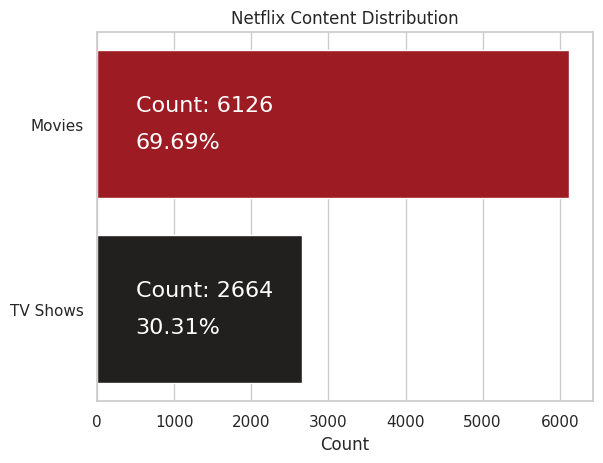

In [23]:
# Count the number of movies and TV shows
total_count = len(data)
movie_count = len(data[data['type'] == 'Movie'])
tv_show_count = len(data[data['type'] == 'TV Show'])

# Calculate the percentage of movies and TV shows
movie_percentage = (movie_count / total_count) * 100
tv_show_percentage = (tv_show_count / total_count) * 100

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'type': ['Movies', 'TV Shows'],
    'count': [movie_count, tv_show_count],
    'percentage': [movie_percentage, tv_show_percentage]
})

# Set the Seaborn style
sns.set(style="whitegrid")

# Create horizontal bar chart using Seaborn
plt.figure(dpi=100)
ax = sns.barplot(x='count', y='type', data=plot_data, palette=["#b20710", "#221f1f"])

# Add text annotations for count and percentage
for i, v in enumerate(plot_data['count']):
    ax.text(500, i-0.1, f"Count: {plot_data['count'][i]}", color='white', verticalalignment='center', size=16)
    ax.text(500, i+0.1, f"{plot_data['percentage'][i]:.2f}%", color='white', verticalalignment='center', size=16)
    #print(i , v)


# Set the labels and title
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('Netflix Content Distribution')

# Remove the y-axis label
ax.set_ylabel('')
plt.savefig("count.png" , dpi=400)
plt.show()

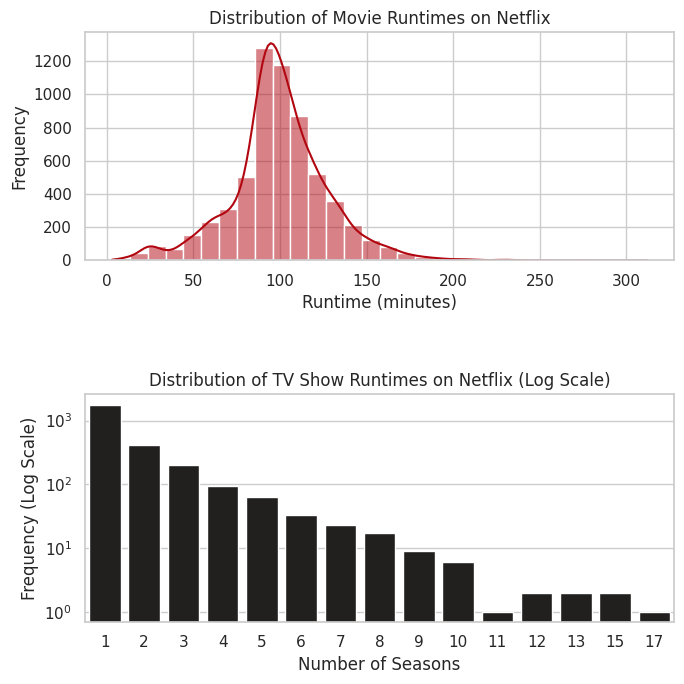

In [24]:
# Convert 'duration' to numerical value (minutes for movies, seasons for TV shows)
data['duration_value'] = data['duration'].str.extract('(\d+)')
data['duration_value'] = pd.to_numeric(data['duration_value'], errors='coerce')

# Filter movies and TV shows
movies_data = data[data['type'] == 'Movie']
tv_shows_data = data[data['type'] == 'TV Show']

# Create subplots
fig, axes = plt.subplots(2,1, figsize=(7,7))

# Histogram with KDE for Movie Runtimes
sns.histplot(movies_data['duration_value'], kde=True, color='#b20710', bins=30, ax=axes[0])
axes[0].set_xlabel('Runtime (minutes)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Movie Runtimes on Netflix')

# Bar plot for TV Show Runtimes (converted to seasons) with log scale
sns.countplot(x='duration_value', data=tv_shows_data, color='#221f1f', ax=axes[1])
axes[1].set_xlabel('Number of Seasons')
axes[1].set_ylabel('Frequency (Log Scale)')
axes[1].set_title('\n\nDistribution of TV Show Runtimes on Netflix (Log Scale)')
axes[1].set_yscale('log')

# Adjust layout
plt.tight_layout()
plt.savefig("runtime.png" , dpi=400)

# Show plot
plt.show()

In [26]:
# Create Plotly world map chart
country_data['normalized_count'] = np.log1p(country_data['count'])

fig = px.choropleth(
    country_data,
    locations='country',
    locationmode='country names',
    color='normalized_count',
    color_continuous_scale='Reds',
    title='Normalized Number of Movies on Netflix by Country',
    labels={'normalized_count': 'Number of Movies'},
    projection='natural earth',  # set the map projection
    color_continuous_midpoint=country_data['normalized_count'].median(),  # set the midpoint of the color scale
    range_color=[country_data['normalized_count'].min(), country_data['normalized_count'].max()]
)

# Manually create the color bar to show the real number of movies
colorbar_tickvals = np.linspace(country_data['normalized_count'].min(), country_data['normalized_count'].max(), 10)
colorbar_ticktext = np.round(np.expm1(colorbar_tickvals)).astype(int)

fig.update_layout(
    coloraxis_colorbar=dict(
        title='Number of Movies',
        tickvals=colorbar_tickvals,
        ticktext=colorbar_ticktext
    )
)

fig.show()

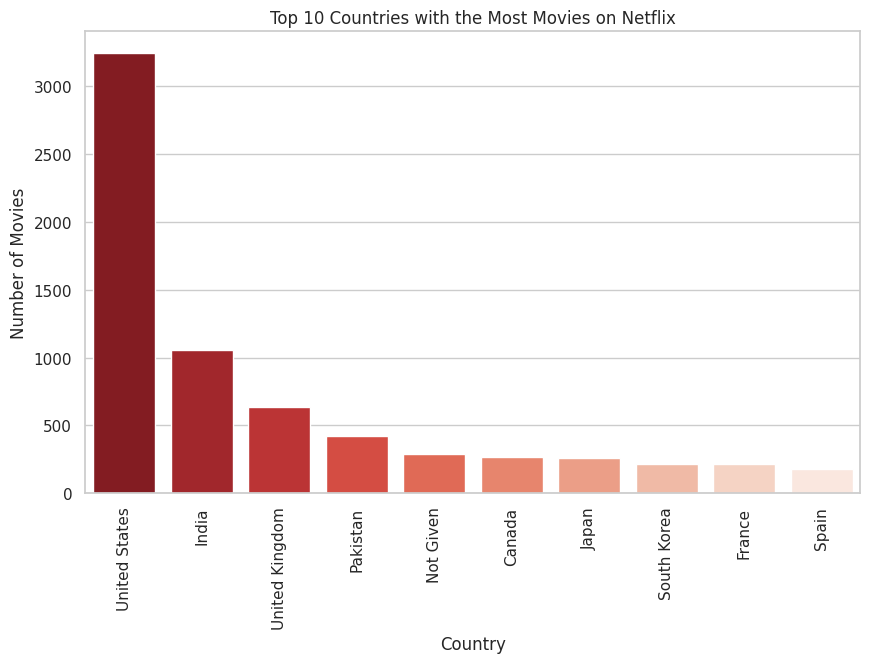

In [25]:
# Group the data by country and count the number of movies
country_data = data.groupby('country').size().reset_index(name='count')
# Sort the data by count in descending order and select the top 10 countries
top_10_countries = country_data.sort_values(by='count', ascending=False).head(10)

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='count', data=top_10_countries, palette='Reds_r')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.title('Top 10 Countries with the Most Movies on Netflix')

plt.xticks(rotation=90)
plt.savefig("countries.png" , dpi=400)
plt.show()



In [27]:
#Distribution of Netflix Additions by Month
# Convert the 'data_added' column to datetime and extract the month
data['added_month'] = pd.to_datetime(data['date_added']).dt.month_name()

# Count the number of additions by month
addition_months = data['added_month'].value_counts().reset_index()
#addition_months["Month"] = addition_months["Month"].sort()
addition_months.columns = ['Month', 'Count']




#Create a pie chart using Plotly
fig = px.pie(addition_months, values='Count', names='Month',
             title='Distribution of Netflix Additions by Month',
             hole=0.5, color_discrete_sequence=px.colors.sequential.Reds_r,
             width=800, height=600)

# Update layout to display top 5 months
pull_values = [0.2, 0.15, 0.1, 0.05, 0.05] + [0] * 7
fig.update_traces(textinfo='percent+label', pull=pull_values)
#pio.write_image(fig, "netflix_additions_pie_chart.png", width=800, height=600, scale=2)
fig.show()




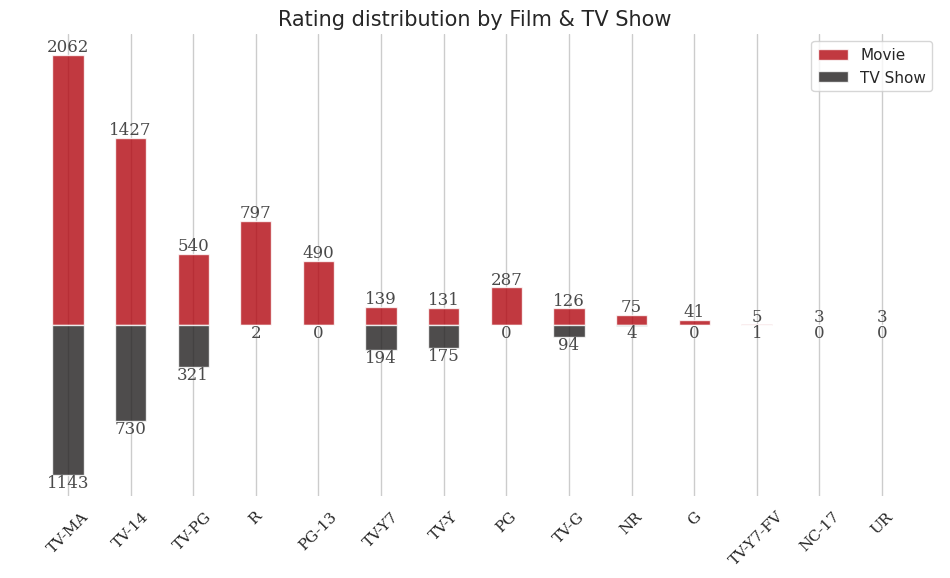

In [28]:
#Rating distribution by Film & TV Show

data['count'] = 1
order = pd.DataFrame(data.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

mf = data.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}",
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

for i in movie.index:
    ax.annotate(f"{movie[i]}",
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')



for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif', rotation = 45)
ax.set_yticks([])

ax.legend()
#fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
ax.set_title('Rating distribution by Film & TV Show', fontsize=15)
plt.savefig("rating.png" , dpi=400)
plt.show()

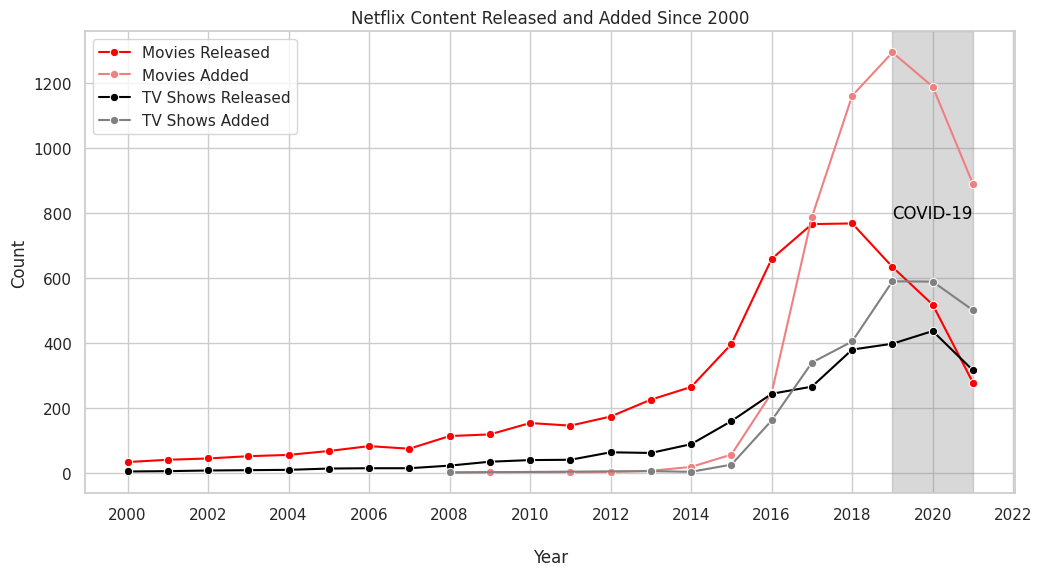

In [29]:
#Netflix Content Released and Added Since 2000
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Filter the data for movies and TV shows from 2000 onwards
movies_data = data[(data['type'] == 'Movie') & (data['release_year'] >= 2000)]
tv_shows_data = data[(data['type'] == 'TV Show') & (data['release_year'] >= 2000)]

# Group by 'release_year' and 'date_added' to count the number of movies and TV shows
release_count_movies = movies_data.groupby('release_year').size().reset_index(name='count')
added_count_movies = movies_data.groupby(movies_data['date_added'].dt.year)['date_added'].size().reset_index(name='count')

release_count_tv = tv_shows_data.groupby('release_year').size().reset_index(name='count')
added_count_tv = tv_shows_data.groupby(tv_shows_data['date_added'].dt.year)['date_added'].size().reset_index(name='count')

# Set the Seaborn style
sns.set(style="whitegrid")

# Create line graph using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='release_year', y='count', data=release_count_movies, marker='o', label='Movies Released', color='Red')
sns.lineplot(x='date_added', y='count', data=added_count_movies, marker='o', label='Movies Added', color='LightCoral')
sns.lineplot(x='release_year', y='count', data=release_count_tv, marker='o', label='TV Shows Released', color='Black')
sns.lineplot(x='date_added', y='count', data=added_count_tv, marker='o', label='TV Shows Added', color='Gray')

# Add a transparent rectangular window for COVID-19 period and annotate it
plt.axvspan(2019, 2021, color='grey', alpha=0.3)
plt.text(2020,800, 'COVID-19', color='black', fontsize=12, ha='center', va='center')


# Set the labels and title
plt.xlabel('\nYear')
plt.ylabel('Count')
plt.title('Netflix Content Released and Added Since 2000')

# Set x-axis grid lines to show every 2 years
plt.xticks(range(2000, 2023, 2))

# Show legend
plt.legend()
plt.savefig("Date.png" , dpi=400)
# Show plot
plt.show()
